# Python-Skimage-Tutorial

*scikit-image* 是在科学计算库 scipy 的子模块 ndimage 基础上构建的，集成了很多图像处理算法，是一个非常受欢迎的 Python 开源图像处理库。

## 安装

```bash
pip install scikit-image
```

## 准备

教程开始之前，建议你先了解在 *scikit-learn* 中定义的一些常见术语，这能帮助你更好地理解和掌握其图像处理的思想。

- array：数组。在 *scikit-learn* 中，以 numpy.ndarray 对象来表示图像。其维度对应于图像的空间维度和彩色图像的颜色通道相对应。

## 教程

### 快速入门

`scikit-image` 可与 `numpy` 数组一起使用，该包作为 `skimage` 被导入：

In [1]:
import skimage

`skimage` 的大部分功能都封装在子模块中，你可以在**接口**章节查看完整的子模块列表。例如，从 `data` 子模块导入一张测试图像：

In [2]:
from skimage import  data
camera = data.camera()
camera

array([[200, 200, 200, ..., 189, 190, 190],
       [200, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       ...,
       [ 25,  25,  27, ..., 139, 122, 147],
       [ 25,  25,  26, ..., 158, 141, 168],
       [ 25,  25,  27, ..., 151, 152, 149]], dtype=uint8)

在 `scikit-image` 中，图像表示为 NumPy 数组，例如二维数组表示灰度图像：

In [3]:
type(camera)

numpy.ndarray

In [4]:
camera.shape # An image with 512 rows and 512 columns

(512, 512)

`skimage.data` 子模块提供了一组返回示例图像的函数，可用于快速开始使用 `scikit-image` 的函数：

In [5]:
coins = data.coins()
from skimage import  filters
threshold_value = filters.threshold_otsu(coins)
threshold_value

107

当然，也可以使用 `skimage.io.imread()` 将你自己的图像作为 NumPy 数组从图像文件中加载：

In [6]:
from skimage import io
moon = io.imread('images/test/moon.png')
moon

array([[116, 116, 122, ...,  93,  96,  96],
       [116, 116, 122, ...,  93,  96,  96],
       [116, 116, 122, ...,  93,  96,  96],
       ...,
       [109, 109, 112, ..., 117, 116, 116],
       [114, 114, 113, ..., 118, 118, 118],
       [114, 114, 113, ..., 118, 118, 118]], dtype=uint8)

### NumPy 图像

`scikit-image` 中的图像由 NumPy 数组表示。因此，使用标准的 NumPy 方法来操作数组可以实现很多常见操作：

In [7]:
from skimage import  data
camera = data.camera()
print(type(camera))
print(camera.shape)
print(camera.size)

<class 'numpy.ndarray'>
(512, 512)
262144


检索有关图像亮度值的统计信息：

In [8]:
print(camera.min())
print(camera.max())
print(camera.mean())

0
255
129.06072616577148


表示图像的 NumPy 数组可以是不同的整数或浮点数类型。关于图像数据类型的详细信息点击[这里](https://scikit-image.org/docs/stable/user_guide/data_types.html)查看。

#### NumPy 索引

NumPy 索引可用于查看和修改像素值：

In [9]:
print(camera[10, 20]) # Get the value of the pixel at the 10th row and 20th column
camera[10, 20] = 0 # Set to black the pixel at the 10th row and 20th column
print(camera[10, 20]) # Check whether the pixel values is modified

200
0


注意！在 NumPy 索引中，第一个维度（`camera.shape[0]`）对应于行，而第二个维度（`camera.shape[1]`）对应于列，原点（`camera[0, 0]`）位于左上角。这与矩阵或线性代数的记数法匹配，但与笛卡尔坐标相反。有关更多坐标的详细信息请点击[这里](https://scikit-image.org/docs/stable/user_guide/numpy_images.html#coordinate-conventions)查看。

除一次访问单个像素外，还能使用 NumPy 的不同索引功能访问或修改多个或所有像素的值。

切片：

In [10]:
camera[:10] = 0 # Set the first ten lines to 0

蒙版：

In [11]:
# Set to 255 the pixels where mask is True
mask = camera < 87
camera[mask] = 255

组合：

In [12]:
import numpy as np
inds_r = np.arange(len(camera))
inds_c = 4 * inds_r % len(camera)
camera[inds_r, inds_c] = 0

当你需要选择一组像素值并在其上执行操作时，蒙版将非常有用。蒙版可以是与图像形状相同的任何布尔数组，这可用于定义感兴趣区域：

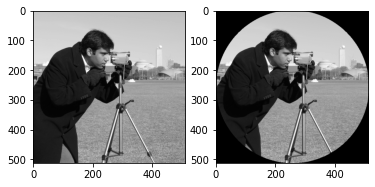

In [13]:
from skimage import data
camera = data.camera()
tmpvar = camera.copy()
nrows, ncols = camera.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (nrows / 2)**2)
camera[outer_disk_mask] = 0

# Plot
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.imshow(tmpvar, plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(camera, plt.cm.gray)

#### 彩色图像

上述所有内容对于彩色图像也都适用。彩色图像也是一个 Numpy 数组，只不过比灰度图像多了一个维度：

In [15]:
from skimage import  data
cat = data.chelsea()
print(type(cat))
print(cat.shape)

<class 'numpy.ndarray'>
(300, 451, 3)


上述结果表明 `cat` 是一个 300x451 像素的图像，具有三个通道（红色、绿色和蓝色）

### 图像数据类型及其含义

`scikit-image` 使用如下七种图像的数据类型：

| 数据类型 | 取值范围       |
|----------|----------------|
| uint8    | 0~$2^8$-1       |
| uint16   | 0~$2^{16}$-1      |
| uint32   | 0~$2^{32}$-1      |
| float    | -1~1 或者 0~1  |
| int8     | -$2^7$~$2^7$-1   |
| int16    | -$2^{15}$~$2^{15}$-1 |
| int32    | -$2^{31}$~$2^{31}$-1 |

更多关于图像数据类型的信息请点击[这里](https://scikit-image.org/docs/stable/user_guide/data_types.html)查看。

## 接口

skimage 的主程序包只提供了几个用于在图像数据类型之间转换的功能；对于大多数的功能，你需要导入其子程序包来实现。

- [color](https://scikit-image.org/docs/stable/api/skimage.color.html#module-skimage.color)：颜色空间转换。
- [data](https://scikit-image.org/docs/stable/api/skimage.data.html#module-skimage.data)：测试图像和实例数据。
- [draw](https://scikit-image.org/docs/stable/api/skimage.draw.html#module-skimage.draw)：绘制基本图像单元（线条、文本等）。是通过操作 Numpy 数组实现的。
- [exposure](https://scikit-image.org/docs/stable/api/skimage.exposure.html#module-skimage.exposure)：图像亮度调整，如直方图均衡化等。
- [feature](https://scikit-image.org/docs/stable/api/skimage.feature.html#module-skimage.feature)：特征检测和提取，例如纹理分析等。
- [filters](https://scikit-image.org/docs/stable/api/skimage.filters.html#module-skimage.filters)：图像锐化、边缘检测、秩滤波、阈值滤波等。
- [graph](https://scikit-image.org/docs/stable/api/skimage.graph.html#module-skimage.graph)：图论运算，例如最短路径。
- [io](https://scikit-image.org/docs/stable/api/skimage.io.html#module-skimage.io)：读取、保存和现实图像和视频。
- [measure](https://scikit-image.org/docs/stable/api/skimage.measure.html#module-skimage.measure)：测量图像属性，例如区域属性和轮廓。
- [metrics](https://scikit-image.org/docs/stable/api/skimage.metrics.html#module-skimage.metrics)：与图像对应的指标计算，例如距离度量、图像相似度等。
- [morphology](https://scikit-image.org/docs/stable/api/skimage.morphology.html#module-skimage.morphology)：形态运算，例如开口或骨架化。
- [restoration](https://scikit-image.org/docs/stable/api/skimage.registration.html#module-skimage.registration)：重建算法，例如反卷积算法、去噪等。
- [segmentation](https://scikit-image.org/docs/stable/api/skimage.segmentation.html#module-skimage.segmentation)：图像分割，将一副完整的图像划分为多个子区域。
- [transform](https://scikit-image.org/docs/stable/api/skimage.transform.html#module-skimage.transform)：几何和其他变换，例如旋转和拉东变换。
- [util](https://scikit-image.org/docs/stable/api/skimage.util.html#module-skimage.util)：通用程序。
- [viewer](https://scikit-image.org/docs/stable/api/skimage.viewer.html#module-skimage.viewer)：一个简单的图像化界面，用于可视化结果和查看参数。

## 参考

> [https://scikit-image.org/](https://scikit-image.org/)